# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
---

 * [영상 처리/딥러닝을 위한 Python Programming2](#영상-처리/딥러닝을-위한-Python-Programming2) 
    * [ itertools](#itertools)
      * [accumulate](#accumulate)
      * [chain](#chain)
      * [combinations](#combinations)
      * [combinations_with_replacement](#combinations_with_replacement)
      * [count](#count)
      * [cycle](#cycle)
      * [islice](#islice)
      * [groupby](#groupby)
      * [filterfalse](#filterfalse)
      * [takewhile](#takewhile)
      * [starmap](#starmap)
    * [functools](#functools)
      * [singledispatch](#singledispatch)
      * [partial](#partial)     
    * [decorator](#decorator)  
      * [@](#@)    
      * [@functools.wraps](#@functools.wraps)    
    * [operator](#operator)
      * [add](#add)
      * [sub](#sub)
      * [mul](#mul)
---

꼭 공식문서 참고 :)!!
    
python iteration
- for, while
- iterator, generator
- itertools
    
전체 데이터를 내부적으로 하나씩 처리하여 변경

array programming 에서는 loop 안함

## 영상 처리/딥러닝을 위한 Python Programming2

 itertools, functools, operator library
- python 기반의 functional paradigm 보조도구로 사용함으로 알아야함

## itertools
- 빅데이터 처리에서 많이 사용
- 파이썬 공식 문서 참고 : https://python.flowdas.com/library/itertools.html

### accumulate
- `Init signature: `  class 인스턴스 하라는 의미
- 내장클래스는 소문자로 시작
- accumulate(self, /, *args, **kwargs)
- accumulate(iterable[, func]) --> accumulate object
    - [, func] option 
- 단계별로 누적된 값을 보여줌 <> reduce는 최종 결과값으로 축약하여 보여줌    

PEP(Python Enhancement Proposals)
- python에 기능 제안해서 발전 시키도록 함

PEP8
- 코딩의 일정 규칙 권고사항
명명규칙(Naming Rules)
1. snake
    - function : load_iris
2. camel
    - class : loadIris
3. capsword(pascal)
    - class :LoadIris
 capsword 방식을 camel로 통칭함 

In [1]:
from itertools import accumulate,chain, combinations, combinations_with_replacement ,count, cycle, islice

In [2]:
import numpy as np
np.add.accumulate([1,2,3,4])

array([ 1,  3,  6, 10])

In [3]:
x=accumulate([1,2,3,4,])
x

In [4]:
dir(x) #__next__

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [5]:
next(x)

1

In [6]:
list(x)

[3, 6, 10]

In [7]:
import tensorflow as tf 

In [8]:
tf.reduce_sum([1,2,3,4,]) #1+2+3+4=10

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [11]:
from functools import reduce
reduce(lambda x,y:x*y , [1,2,3,4]) #1*2*3*4=24

24

In [12]:
from operator import mul
x=accumulate([1,2,3,4],mul) 
next(x)

1

In [13]:
list(x)

[2, 6, 24]

In [15]:
tf.keras.layers.Lambda  #함수를 집어넣어 레이어 생성
tf.keras.layers.add

<function tensorflow.python.keras.layers.merge.add(inputs, **kwargs)>

### chain
- iterable형태들을 넣으면 각 iterable 이 끝날때까지 \_\_next__ 함
- chain(*iterables) --> chain object 가변 포지셔널(몇개를 넣어도 상관 없음)

In [16]:
x=chain([1,2,3],[4,5,6])
list(x)  #하나로 엮어줌 

[1, 2, 3, 4, 5, 6]

### combinations
- combinations(iterable, r) --> combinations object
- 서로 다른 4개중에서 3개 뽑는 조합, nCr

In [17]:
x=combinations([1,2,3,4],3)

In [18]:
list(x) #중복 없음

[(1, 2, 3), (1, 2, 4), (1, 3, 4), (2, 3, 4)]

### combinations_with_replacement
- 복원추출(sampling **with replacement**)
    - 중복값이 있는것을 알 수 있음
    - 예. 주머니에 빨간공,하얀공 여러개 중에서 뽑고나서 다시 집어 넣음
- combinations_with_replacement(iterable, r) --> combinations_with_replacement object

> 머신러닝 ensemble 의 bagging(Bootstrap Aggregation)에서 with repalce 기억하시나요?
    - 일부 데이터 추출하여 모델을 만들기를 다시 넣고 만들기를 반복하여  평균내어 과적합 줄임
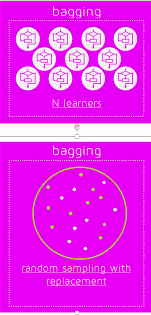

In [19]:
x=combinations_with_replacement([1,2,3,4],3)

In [20]:
list(x) #중복 있음

[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 4),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 4),
 (3, 3, 3),
 (3, 3, 4),
 (3, 4, 4),
 (4, 4, 4)]

### count 
- count(start=0, step=1) --> count object 
    - 키워드 방식
- satrt 부터 시작하여 step만큼 증가

1 부터시작하여 3만큼 증가

In [21]:
x=count(step=3, start=1) #키워드 방식( 순서 무 상관)
next(x)

1

In [22]:
next(x) #3 만큼 증가함

4

### cycle 
- cycle(iterable) --> cycle object
- 무한으로 iterable을 next  할 수 있음

In [23]:
x=cycle([1,2,3])

In [24]:
next(x),next(x)

(1, 2)

### islice
- islice(iterable, stop) --> islice object
- 딥러닝에서 데이터를 보고자 할때 전체를 보는것이 아닌 몇개까질 볼지 정함(가끔 쓸거임)

count는 무한히 증가하는데 islice 통해서 4개 까지만 봄

In [12]:
z=islice(count(),4) #4개 까지
next(z),next(z),next(z),next(z)

(0, 1, 2, 3)

데이터 중 몇개까지만 볼것인지 지정해서 봄
https://www.tensorflow.org/tutorials/images/classification?hl=ko

데이터 10개중에 0번째거 보기 

In [8]:
for i in range(10):
    print(i)
    break # loop 멈춤

0


In [7]:
next(iter(range(10)))

0

In [110]:
[1,2,3,4,5][slice(1,3)] #slicing과 비슷

[2, 3]

### groupby
- 처음에는 이해하기 어려움
- pandas에서는 중요한 aggregation 기법
    - groupby 이전에 했었는데 기억나시나요? 반가우시죠?? 
    - 내부적으로 sorting 한 후에 그룹화함

> #### SAC
    - 논문 제목 : The Split-Apply-Combine Strategy for Data Analysis by Hadley Wickham 
    - groupby의 숨겨진 개념( R프로그래밍에서 가져옴)
    - tf2.0부터 pandas가 직접 연동되어 중요한 기법(특히 데이터 분석)

In [25]:
import pandas as pd
import seaborn as sns

In [26]:
tips=sns.load_dataset('tips')
tips.groupby('sex').mean() #성별 기준으로 그룹화 하여 평균을 냄

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [13]:
from itertools import groupby

itertools groupby 
 - **연속적으로 동일한 값들을 하나의 그룹화 함**
    
- 같은 값이 연속적으로 있을때 하나의 그룹으로 묶음

In [29]:
x=groupby([1,2,3,1,2,3,])

In [30]:
list(x) #그룹 6개.. 

[(1, <itertools._grouper at 0x7fe15ddc9d90>),
 (2, <itertools._grouper at 0x7fe15ddc9e50>),
 (3, <itertools._grouper at 0x7fe15ddc9e90>),
 (1, <itertools._grouper at 0x7fe15ddc9ed0>),
 (2, <itertools._grouper at 0x7fe15ddc9f10>),
 (3, <itertools._grouper at 0x7fe15ddc9e10>)]

In [32]:
x=groupby([1,2,3,1,1,1,])
list(x)  #그룹 4개 ; 뒤에 1 3개가 연속적으로 있어 1개의 그룹으로 되기 때문

[(1, <itertools._grouper at 0x7fe15ddd58d0>),
 (2, <itertools._grouper at 0x7fe15ddd5a90>),
 (3, <itertools._grouper at 0x7fe15ddd5990>),
 (1, <itertools._grouper at 0x7fe15ddd5a10>)]

In [30]:
x=groupby([1,1,1,1,2,3])
list(x)  #그룹 3개 ; 정렬된경우

[(1, <itertools._grouper at 0x7fc0e80957d0>),
 (2, <itertools._grouper at 0x7fc0e8095b10>),
 (3, <itertools._grouper at 0x7fc0e8095c90>)]

- groupby(iterable, **key** =None) -> make an iterator that returns consecutive

In [33]:
y=groupby([(1,'1'),(1,'2'),(2,'1'),(2,'2')])

In [34]:
list(y)

[((1, '1'), <itertools._grouper at 0x7fe15de10150>),
 ((1, '2'), <itertools._grouper at 0x7fe15de10190>),
 ((2, '1'), <itertools._grouper at 0x7fe15de101d0>),
 ((2, '2'), <itertools._grouper at 0x7fe15de10210>)]

lambda x:x[0] 0번째 값 기준으로 그룹핑

In [42]:
y=groupby([(1,'1'),(1,'2'),(2,'1'),(2,'2')],lambda x:x[0])

In [43]:
list(y)

[(1, <itertools._grouper at 0x7fe15de319d0>),
 (2, <itertools._grouper at 0x7fe15de31a50>)]

lambda x:x[1] 1번째 값 기준으로 그룹핑

In [41]:
y=groupby([(1,'1'),(1,'2'),(2,'1'),(2,'2')],lambda x:x[1])
list(y)

[('1', <itertools._grouper at 0x7fe15de31a90>),
 ('2', <itertools._grouper at 0x7fe15de314d0>),
 ('1', <itertools._grouper at 0x7fe15de317d0>),
 ('2', <itertools._grouper at 0x7fe15de31710>)]

- 1 그룹 1개 [1]
- 2 그룹 1개 [2]
- 3 그룹 1개 [3]
- 1 그룹 4개 [1, 1, 1, 1]
- 2 그룹 2개 [2, 2]
- 3 그룹 2개 [3, 3]

In [53]:
x=groupby([1,2,3,1,1,1,1,2,2,3,3])
for i,j in x:
    print(i,list(j))  # j type casitng해서 봄

1 [1]
2 [2]
3 [3]
1 [1, 1, 1, 1]
2 [2, 2]
3 [3, 3]


### sorted
- `*` 이후부터 keywords only
-  기본 오름차순 정렬, 키값이 안정해지면 앞의 값 기준

 기본 앞값 기준으로 정렬

In [14]:
sorted([(1,'1'),(1,'2'),(2,'1'),(2,'2')]) #오름차순

[(1, '1'), (1, '2'), (2, '1'), (2, '2')]

In [15]:
sorted([(1,'1'),(1,'2'),(2,'1'),(2,'2')],reverse=True) #내림차순 

[(2, '2'), (2, '1'), (1, '2'), (1, '1')]

뒤를 기준으로 정렬 

In [45]:
sorted([(1,'1'),(1,'2'),(2,'1'),(2,'2')],key=lambda x:x[1])

[(1, '1'), (2, '1'), (1, '2'), (2, '2')]

In [16]:
sorted([(1,'1'),(1,'2'),(2,'1'),(2,'2')],key=lambda x:x[1],reverse=True)

[(1, '2'), (2, '2'), (1, '1'), (2, '1')]

In [17]:
from itertools import filterfalse, tee, takewhile,starmap

### filterfalse
- map, filter, reduce 에서 filter는 True값만 반환하지만 filterfalse  **False인 값을 반환**
- 상황에 맞추어 기호에 따라 사용

In [18]:
x=filter(lambda x:x>2,[1,2,3,4]) # 2보다 큰 값(True) 
list(x)

[3, 4]

In [19]:
x=filterfalse(lambda x:x>2,[1,2,3,4]) # 2보다 작은값(False) 1,2
list(x)

[1, 2]

### tee
- tee(iterable, n=2) --> tuple of n independent iterators.
- 기본 2개의 독립적인 iterator로 만들며 n개를 지정하면 n개의 독립적인 iterator를 tuple형식으로 가져옴

In [20]:
a=tee([1,2,3,4,5,6])
a[0],a[1] #2개의 결과값

(<itertools._tee at 0x7ff39b7114b0>, <itertools._tee at 0x7ff39b711460>)

In [21]:
len(tee([1,2,3,4,5,6])) # len technique -결과가 2개

2

In [22]:
a,b,c=tee([1,2,3,4,5,6],3) #3개의 iterator 생성,
a

In [23]:
b

In [24]:
list(a)

[1, 2, 3, 4, 5, 6]

In [25]:
list(b)

[1, 2, 3, 4, 5, 6]

In [26]:
list(c)

[1, 2, 3, 4, 5, 6]

### takewhile
- takewhile(predicate, iterable) --> takewhile object
    - predicate:true / false를 반환
-  각 조건값이 연속적으로 True일 때에만 실행이 됨 
- StopIteration Error 이용해서 Error 발생
    > #### EAFP(Easier to ask for forgiveness than permission)
    **허락보다 용서가 쉬움**
    무조건 실행하고 조건에 안 맞으면 에러를 발생 시킴을 의미
    - 파이썬의 철학이 깃든 파이썬 공식문서의 용어집 참고 : https://docs.python.org/3/glossary.html

In [31]:
x=takewhile(lambda x:x>3, [1,2,3,4,5,6]) #4,5,6만 해당 하는데 처음부터 True가 아니라서 불가

In [32]:
list(x) #next할수있는게 없음

[]

In [33]:
next(x)

StopIteration: 

In [29]:
x=takewhile(lambda x:x<3, [1,2,3,4,5,6]) #1,2까지 연속적으로 True 

In [30]:
list(x)

[1, 2]

### starmap
- `starmap(function, sequence) --> starmap object`
- iterable에서 얻은 인자를 사용하여 함수를 계산하는 이터레이터
- 갯수를 유연하게 만드는 map 으로 전처리에서 많이 사용함(특히 finance) 
- 가변 포지셔널 방식으로 사용
- **sequence** 순서대로 들어감
    - indexing, slicing 가능

In [48]:
x=starmap(lambda x,y:x*y ,[(4,5),(6,3)])  #4*5=20 , 6*3=18
next(x)

20

In [49]:
list(x)

[18]

map과 동일


tf 이용해서 만드는 5가지 모델
1. tf.nn
2. tf.estimator         #functional
3. tf.keras.Sequetial
4. tf.keras.Model       #functional
5. tf.keras.composition #functional

2,4,5 functional paradigm 임

전문가용 빠른시작 참고 : https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

하단에 혼재되어 사용됨

In [ ]:
class MyModel(Model):               #상속
  def __init__(self): 
    super(MyModel, self).__init__() #super
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):  #functional paradigm
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [ ]:
@tf.function                       #decorator
def train_step(images, labels):
  with tf.GradientTape() as tape:  #with
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

### functools
-  reduce 
    - 1일차에서 map,filter, reduce 다룸
- partial
- singledispatch
- 나머지는 편의 기능

In [108]:
from functools import reduce #하나값으로 축약해줌

### singledispatch
- 오버로딩과 관련(다형성)
- 타입별로 다르게 실행하여 python을 확장 시켜줌
- 시스템화 할 때 도움됨

In [212]:
from functools import singledispatch #제일 어려운 개념

tensorflow에서 tf.reduce_sum, reduce_mean 있음

용어집(일반적 프로그래밍 언어)

- first class function
- higher order function
    - function을 argument 로 받을 수 있고 
    - function을 return 함
       -  예. Java
    - 추상화하여 코드를 간결하게 만듦
    - 요즘 프로그래밍 기법

#### seaborn
- 통계적 기법을 사용해서 시각화함 
텐서플로우 공식문서 기본 예시에 사용됨 참고 :https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [4]:
import seaborn as sns

In [5]:
iris=sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- pair plot : 산점도, 분포를  볼 수 있음

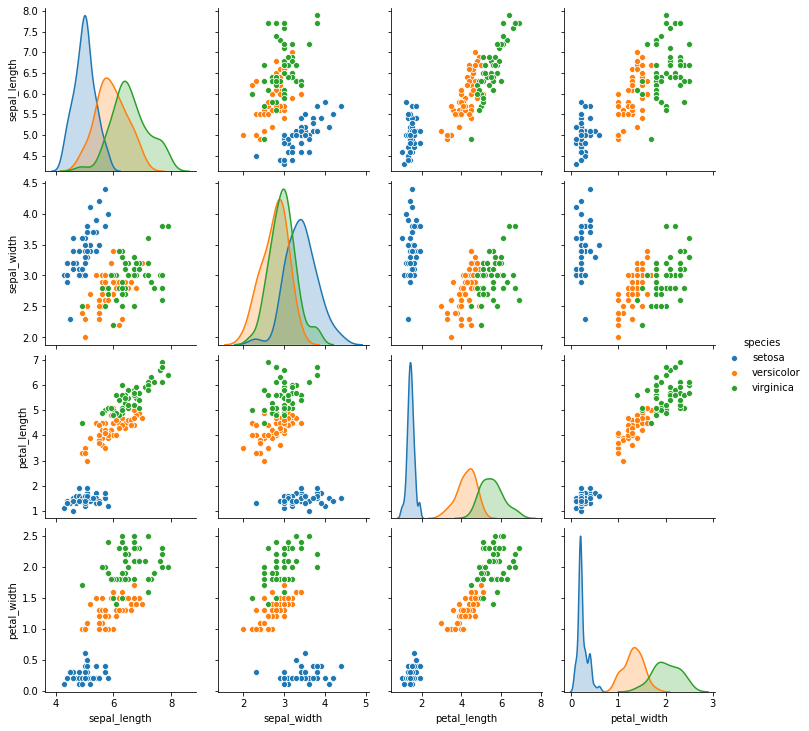

In [112]:
sns.pairplot(iris,hue='species')  #hue = iris 종류별 색상 구분

In [114]:
iris.sepal_length.mean() #reduction: 하나로 축약됨

5.843333333333335

In [115]:
iris.head()              #데이터 최상위 5개 보여줌

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
iris.head(10)            #데이터 최상위 10개

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### partial
- 기본 인자를 바꾸어 자기만의 함수로 바꿀수 있음

partial을 이용하여 기본 상위10개를 추출하도록 바꿈

In [6]:
from functools import partial #어떻게 쓰이는지 

In [7]:
head2=partial(iris.head, n=10)
head2() #n=10

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [126]:
head1=iris.head
head1(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [123]:
head2=partial(iris.head, n=9)
head2() #기본 9개로 바꿈

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


## decorator
- 이미 만들어진 함수를  더 복작합 형태로 바꾸어 줄 수 있음 (functools의 partial과 비슷한 원리)
- decoratoer를 쉽게 해주는게 wrap
- 이미 만들어진 것을 바꿀때 사용함
- tf 에서 데코레이터 많이사용함 

In [127]:
def x(f):
    return f('hi') #function return 

In [136]:
x

<function __main__.x(f)>

In [132]:
x(print) #print를 인자로 받음

hi


In [133]:
def xx(f):
    def yy():
        f('hi') #f parameter를 실행
    return yy #return은  function yy

In [134]:
xx(print)

<function __main__.xx.<locals>.yy()>

In [135]:
xx(print)()

hi


In [163]:
def xx(f):
    def yy(x):
        f(x)   #yy function의 인자를 받음
    return yy 

In [138]:
xx(print)

<function __main__.xx.<locals>.yy(x)>

In [140]:
xx(print)('hi')

hi


- xx 호출하여 print를 f에 넣음
- yy가 호출되면 입력받은 'hi'가 f(x)에 넣어져 hi가 출력

In [157]:
def xx(f):
    def yy(x):
        f(x+'!')
    return yy 

In [149]:
xx(print)('hi') #위와 동일

hi!


In [151]:
def xx(f):
    def yy(x):
        pass       #xx에서 바로 return 으로 이동
    return f(x+'!')#yy와 상관 없음

In [153]:
xx(print)         #TypeError

TypeError: unsupported operand type(s) for +: 'function' and 'str'

- 원래 y 자지 자신 반환하는 함수
- xx에 넣었더니 자기자신+1로 반환하는 함수로 바꾸어줌 

In [8]:
def xx(f):
    def yy(x):
        return f(x+1) #자기 자신 +1
    return yy 

def y(x):
    return x          # 자기자신 반환

In [9]:
xx(y) #xx(f)-> f=> y

<function __main__.xx.<locals>.yy(x)>

In [10]:
xx(y)(3)

4

### @
- decorator 문법
- 기존의 함수를 건들지 않고 함수를 변화시킴
- class 에서 오버라이드라는 개념과 비슷 
    - 오버라이드랑 super랑 연동됨 -> 나중에 다룸 

In [16]:
#high order function 함수를 인자로 받고 리턴함 
#decorator 문법 
def xx(f):
    def yy(x):
        return f(x+1)
    return yy 

def z(x):
    return x

xx(z)(4)

5

- decorator가 기존 함수를 +1 할 수 있도록- z의 기능을 xx로 추가하여 함수의 기능을 바꾸어줌

In [17]:
#상동 
@xx
def z(x):
    return x

z(4)

5

In [176]:
xx

<function __main__.xx(f)>

In [177]:
xx(print)

<function __main__.xx.<locals>.yy(x)>

<function __main__.xx.<locals>.yy(x)>
    
 클래스의 3가지 decorator 
    클래스 정의할때 사용
    기존의 기능을 바꾸기 위해서 사용
   **원래 함수의 기능을 +@ 한다고 기억하는게 핵심!!!**

In [ ]:
#class 3가지 decorators - 클래스 정의 ; 기존 기능을 바꿈
class C:
    @classmethod
    @staticmethod
    @property

전문가를 위한 빠른 시작 예시에도 많음을 참고 : https://www.tensorflow.org/tutorials/quickstart/advanced?hl=ko

### @functools.wraps
- 다른 함수로 감싸 진다는 점은 오류 추적 및 문서화에 걸림돌이 되는 부분이었습니다
-  데코레이터 팩토리는 signature ,docstring 을 보존
- 함수를 쉽게 사용하도록 만들어줌 
  -  < locals >가 사라지면서 무엇이 실행되는지 명확하게해줌

In [106]:
#high order function 함수를 인자로 받고 리턴함 
#decorator 문법 
def xx(f):
    def yy(x):
        print('----------') #-----출력 기능 추가
        return f(x)    
    return yy 

In [107]:
#상동 
@xx
def y(x):
    ''' 설명'''
    return x

y(4)

----------


4

In [108]:
xx, xx(y)

(<function __main__.xx(f)>, <function __main__.xx.<locals>.yy(x)>)

In [109]:
y, y.__name__,y.__doc__ #없음 #함수의 이름은 wrapper인 yy가 나옴

(<function __main__.xx.<locals>.yy(x)>, 'yy', None)

In [110]:
import functools

y인데 xx로 변화된 y를 명확하게 해주기 때문에 Functools 쓰는게 좋음

In [131]:
#인자 1개 받는 경우
def xx(f):
    @functools.wraps(f)
    def yy(x):
        print('----------') #-----출력 기능 추가
        return f(x)
    return yy 


In [132]:
def y(x):
    '''설명'''
    return x
xx(y)(1)

----------


1

In [128]:
@xx
def y(x):
    '''설명'''
    return x

In [117]:
y(2)  # xx 기능 추가됨

----------


2

In [133]:
xx,xx(y)             #xx(y)결과물 바뀜 xx.<locals>사라짐

(<function __main__.xx(f)>, <function __main__.y(x)>)

In [134]:
y,y.__name__,y.__doc__ #함수 이름y,설명 제대로 나옴

(<function __main__.y(x)>, 'y', ' 설명')

In [123]:
#인자 안 받는 경우
def xx(f):
    @functools.wraps(f)
    def yy():               #인자 안 넣어도 됨
        print('----------') #-----출력 기능 추가
        return f()
    return yy 

@xx
def z(): 
    return 1
z()  #오류 없음

----------


1

In [122]:
xxx #NameError 메모리에 없음 -> 정의 안 되어 있음

NameError: name 'xxx' is not defined

위와 같이 인자에 따라서 바꾸는것은 비효율적

- 받는 인자와 상관없이 사용하는 decorator
- 키워드는 포지셔널 앞에 사용 못함

In [206]:
def xx(f):
    @functools.wraps(f)
    def yy(*args,**kwargs):  #가변 포지셔널, 가변 키워드           
        print('----------') #-----출력 기능 추가
        return f(*args,**kwargs)
    return yy 

In [208]:
@xx
def y(x):
    return x
y(1)

----------


1

In [207]:
@xx
def z(): 
    return 1
z()

----------


1

colab은 아래와 같이 소스를 바로 볼 수 있음

In [211]:
import inspect
print(inspect.getsource(xx))

def xx(f):
    @functools.wraps(f)
    def yy(*args,**kwargs):             
        print('----------') #-----출력 기능 추가
        return f(*args,**kwargs)
    return yy 



decorator에서 인자 맞추는게 더 중급

### operator
tf layer에서  functional paradigm으로 연산 지원
- add, lambda, subtract 연산가능

In [ ]:
tf.keras.layers.add
tf.keras.layers.subtract
tf.keras.layers.Lambda

In [214]:
from operator import add,sub, mul

In [215]:
sub(5,1)

4

In [216]:
add(5,1)

6

### 연산자 오버로딩 
- 연산자 +,-,*,/ 대신에 함수를 사용

In [219]:
a=3          #연산자
a.__add__(5) #메소드

8

In [193]:
%lsmagic #사용 가능한 기능 

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [12]:
%timeit #실행 시간

In [194]:
%whos   #현재 메모리 공간에 있는  변수들

Variable                        Type                          Data/Info
-----------------------------------------------------------------------
a                               _tee                          <itertools._tee object at 0x7fe15de9a140>
accumulate                      type                          <class 'itertools.accumulate'>
b                               _tee                          <itertools._tee object at 0x7fe15de9aeb0>
chain                           type                          <class 'itertools.chain'>
combinations                    type                          <class 'itertools.combinations'>
combinations_with_replacement   type                          <class 'itertools.combinations_with_replacement'>
count                           type                          <class 'itertools.count'>
cycle                           type                          <class 'itertools.cycle'>
filterfalse                     type                          <class 'itertools.filt

각각의 프레임워크는 유기적으로 python으로 연동됨을 알 수 있음
다음시간 : 객체지향에서 상속해서 사용